### Objective of Automobile milege prediction project

In [26]:
#import libraries

#for creating plot
import matplotlib.pyplot as plt
#for data preperation and analysis
import pandas as pd
import numpy as np
#for distibution plot and heatmap
import seaborn as sns

#for creating training and test samples
from sklearn.model_selection import train_test_split

#feature selection (to select significant variables)
from sklearn.feature_selection import SelectKBest, f_regression

#for building linear regression model
from sklearn.linear_model import LinearRegression

In [52]:
df=pd.read_csv(r"C:\Users\pc\Downloads\automobile data.csv")

In [53]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,2015,1,buick
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth
3,16.0,8,304.0,150,3433,12.0,2015,1,amc
4,17.0,8,302.0,140,3449,10.5,2015,1,ford


In [54]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

### Variable Description


In [55]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
393,27.0,4,140.0,86,2790,15.6,2003,1,ford
394,44.0,4,97.0,52,2130,24.6,2003,2,volkswagen
395,32.0,4,135.0,84,2295,11.6,2003,1,dodge
396,28.0,4,120.0,79,2625,18.6,2003,1,ford
397,31.0,4,119.0,82,2720,19.4,2003,1,chevrolet


In [56]:
df.shape

(398, 9)

In [57]:
df.dtypes


MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [59]:
#horse power is numeric varible but in df it is stored as categorical
#so we need to change dtype of horsepower
df['Horsepower']=pd.to_numeric(df['Horsepower'],errors='coerce')
#errors='coerce', it means that if there's an error encountered during the conversionor parsing process
#problematic value will be set to NaN

In [60]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [61]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,104.469388,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,75.000000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,2015.000000,3.000000


### Feature engineering process

In [62]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

In [63]:
# there are 6 missin values in horsepower variable
#missing value imputation
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].median())

In [64]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

#### check outlier 

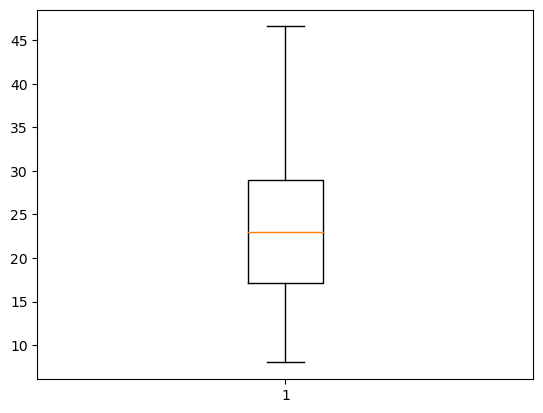

In [65]:
plt.boxplot(df['MPG'])
plt.show()

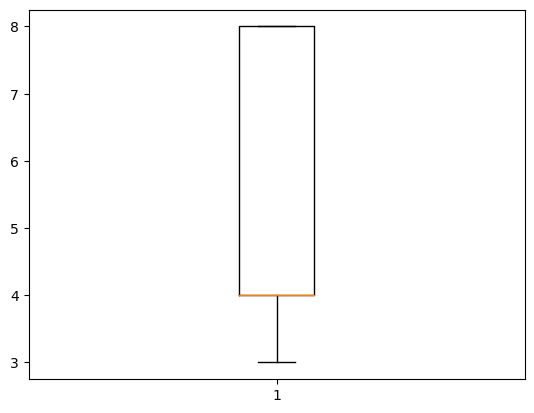

In [66]:
plt.boxplot(df['Cylinders'])
plt.show()

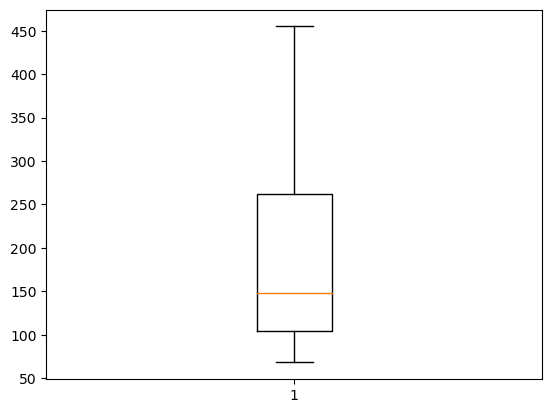

In [67]:

plt.boxplot(df['Displacement'])
plt.show()

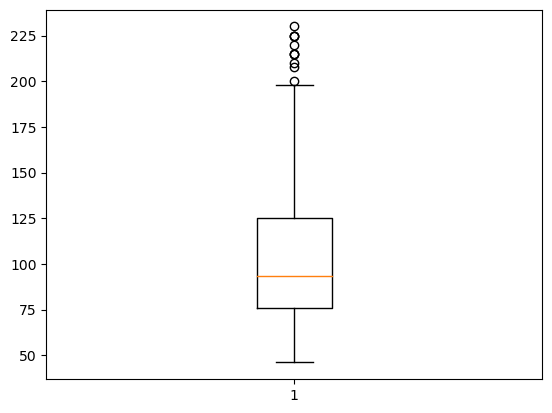

In [68]:
plt.boxplot(df['Horsepower'])
plt.show()

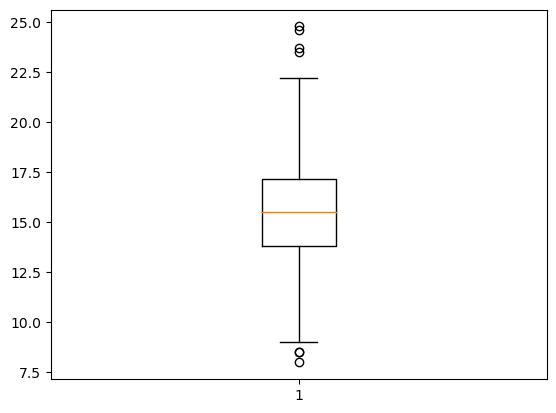

In [69]:
plt.boxplot(df['Acceleration'])
plt.show()

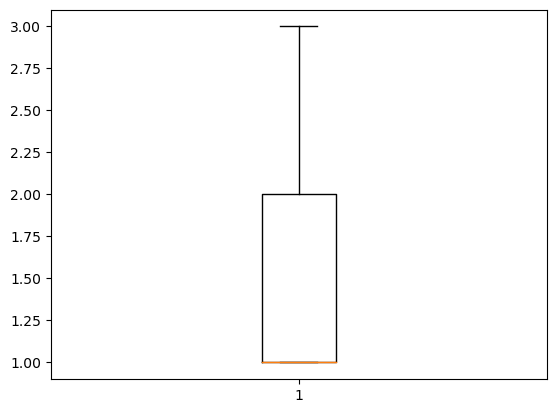

In [70]:
plt.boxplot(df['Origin'])
plt.show()

In [71]:
def remove_outliers(d,c):
    #d is variable for df and c is the variable for column
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate iqr(inter quantile range)
    iqr=q3-q1
    
    #find upper bound(ub)and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    #filter good data(ie eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier

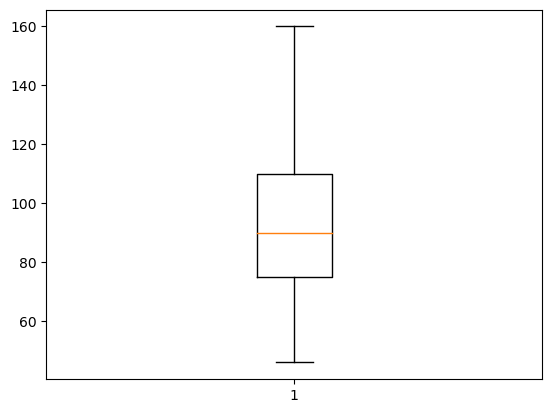

In [74]:
df=remove_outliers(df,'Horsepower')
plt.boxplot(df['Horsepower'])
plt.show()

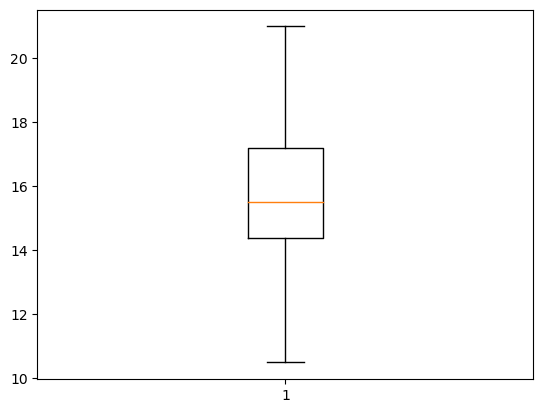

In [77]:
df=remove_outliers(df,'Acceleration')
plt.boxplot(df['Acceleration'])
plt.show()

### EDA(exploratory Data Analysis)
    Distibution
    Data mix
    Correlation

In [78]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [79]:
df.shape

(348, 9)

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\338035577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG'])


<Axes: xlabel='MPG', ylabel='Density'>

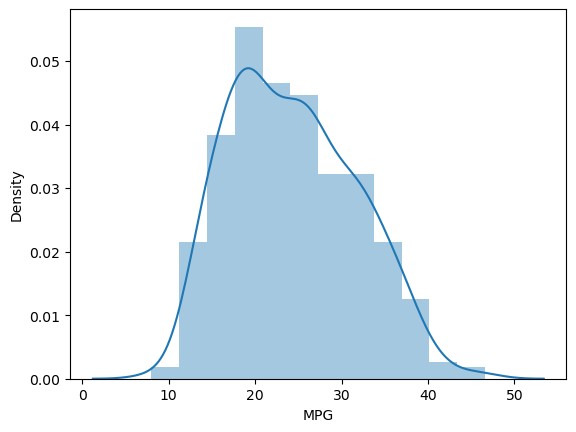

In [80]:
sns.distplot(df['MPG'])

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\1049898876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cylinders'])


<Axes: xlabel='Cylinders', ylabel='Density'>

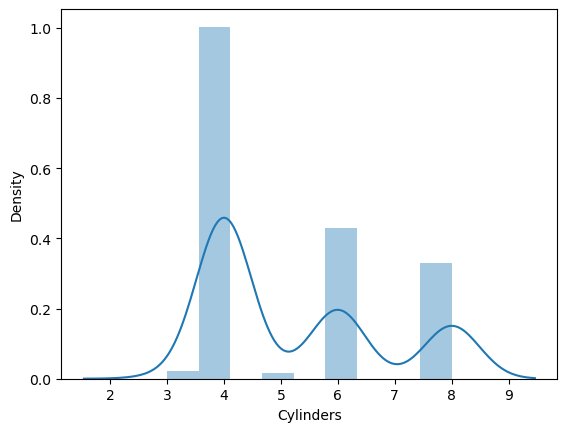

In [81]:
sns.distplot(df['Cylinders'])

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\2895956405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Displacement'])


<Axes: xlabel='Displacement', ylabel='Density'>

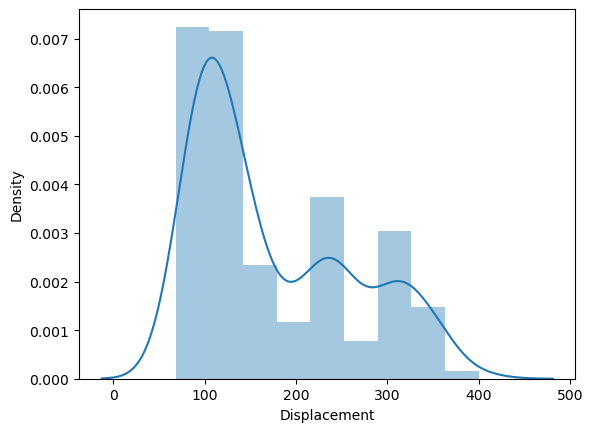

In [82]:
sns.distplot(df['Displacement'])

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\4028433040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Horsepower'])


<Axes: xlabel='Horsepower', ylabel='Density'>

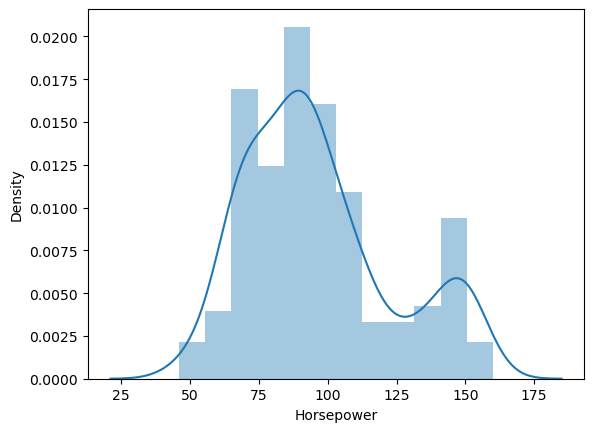

In [83]:
sns.distplot(df['Horsepower'])

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

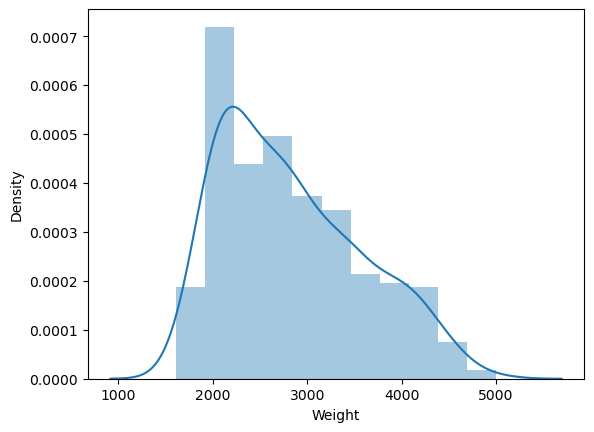

In [84]:
sns.distplot(df['Weight'])

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\863374677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acceleration'])


<Axes: xlabel='Acceleration', ylabel='Density'>

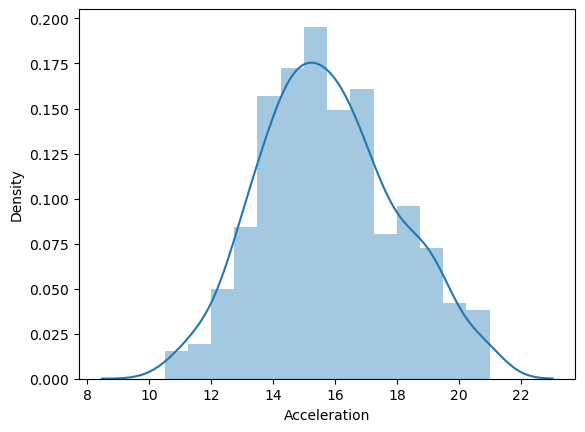

In [85]:
sns.distplot(df['Acceleration'])

In [86]:
#check data mix for categorical variable
#cylinder,model_year,car_name

<Axes: xlabel='Cylinders'>

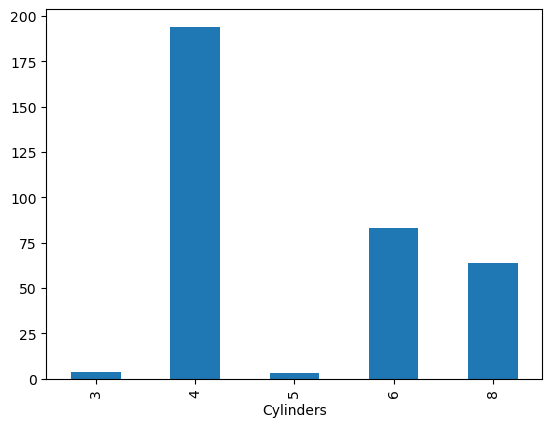

In [87]:
df.groupby('Cylinders')['Cylinders'].count().plot(kind='bar')

<Axes: xlabel='Model_year'>

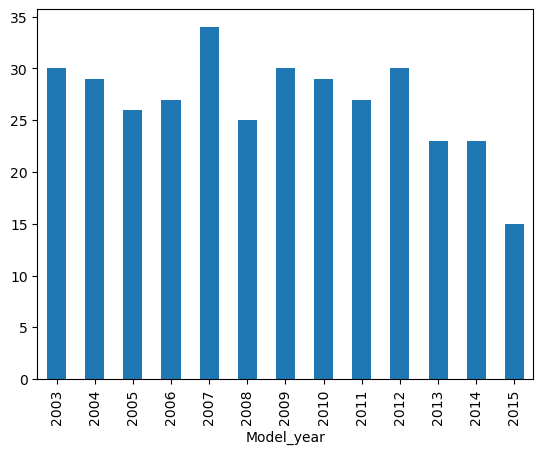

In [88]:
df.groupby('Model_year')['Model_year'].count().plot(kind='bar')

<Axes: xlabel='Origin'>

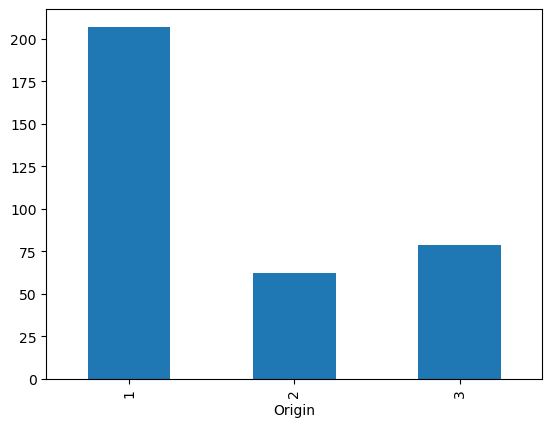

In [89]:
df.groupby('Origin')['Origin'].count().plot(kind='bar')

<Axes: xlabel='Car_Name'>

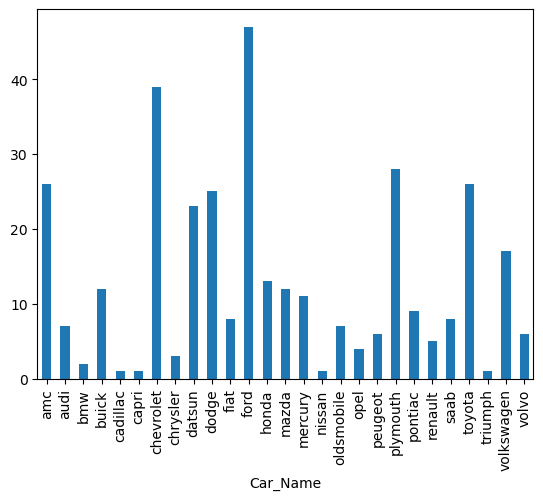

In [90]:
df.groupby('Car_Name')['Car_Name'].count().plot(kind='bar')

### Pearson correlation

In [91]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,8.0,8,307.0,130.0,3504,12.0,2015,1
2,18.0,8,318.0,150.0,3436,11.0,2015,1
3,16.0,8,304.0,150.0,3433,12.0,2015,1
4,17.0,8,302.0,140.0,3449,10.5,2015,1
14,24.0,4,113.0,95.0,2372,15.0,2015,3


In [92]:
df_numeric=df_numeric.drop(['Cylinders','Model_year','Origin'],axis=1)
df_numeric.head()

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8.0,307.0,130.0,3504,12.0
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
14,24.0,113.0,95.0,2372,15.0


<Axes: >

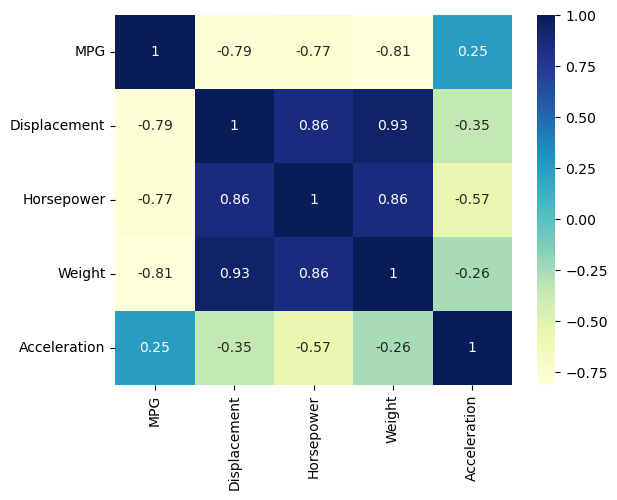

In [93]:
#create heatmap
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

In [94]:
#using the pearson correlation test we found that the key drivers(input variables)

_______END OF EDA_______

In [95]:
# check if there is any problems in categorical variables
# like spelling diff ,case sensitive value

In [96]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [97]:
df['Cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [98]:
df['Model_year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003], dtype=int64)

In [99]:
df['Origin'].unique()

array([1, 3, 2], dtype=int64)

In [101]:
df['Car_Name'].unique()

array(['chevrolet', 'plymouth', 'amc', 'ford', 'toyota', 'datsun',
       'volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'pontiac',
       'mercury', 'opel', 'fiat', 'dodge', 'buick', 'oldsmobile', 'mazda',
       'volvo', 'renault', 'honda', 'capri', 'chrysler', 'cadillac',
       'triumph', 'nissan'], dtype=object)

### Dummy Conversion(One-hot encoding)

In [102]:
#remove model_year as it doesnt signify anything in terms of impact on target variable
df=df.drop('Model_year',axis=1)

In [103]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin            int64
Car_Name         object
dtype: object

In [105]:
#cylinders and origin are categorical variables stored as numeric.
#hence we need to change the datatype of these variables to object
df['Cylinders']=df['Cylinders'].astype('object')
df['Origin']=df['Origin'].astype('object')
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin           object
Car_Name         object
dtype: object

In [106]:
#create a new df to store categorical variable for dummy conversion
df_categorical=df.select_dtypes(include='object')
df_categorical.head()

,Cylinders,Origin,Car_Name
0,8,1,chevrolet
2,8,1,plymouth
3,8,1,amc
4,8,1,ford
14,4,3,toyota


In [107]:
#dummy conversion
#we drop 1st index for removing dependence of independent variable(multicollinearity)
df_dummy=pd.get_dummies(df_categorical,drop_first=True)
df_dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,Origin_3,Car_Name_audi,Car_Name_bmw,Car_Name_buick,Car_Name_cadillac,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [108]:
df_final=pd.concat([df_numeric,df_dummy],axis=1)
df_final.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,307.0,130.0,3504,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150.0,3436,11.0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,16.0,304.0,150.0,3433,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140.0,3449,10.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
14,24.0,113.0,95.0,2372,15.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [109]:
#create x and Y
x=df_final.drop('MPG',axis=1)
y=df_final['MPG']

In [111]:
#testing and training sample
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [113]:
#check sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(243, 36) (105, 36) (243,) (105,)


### FEATURE SELECTION

In [114]:
#p value to test the significance of the hypothetical mechanism.
#p value off variable <0.05 significant,confidence is 95%>
#VIF factor tells you to how expensive(non relevent)that varaible ,how useless is,
#we choose small vif.

In [115]:
#VIF(variable inflation factor) it is a score that tells as the relevency of a variable,
# alog with p value we also check VIF to find the significan variable.
# VIF=1/(1-R^2)
# p value :measures the strength of evidence against null hypothesis.
# a variable with p value <0.05 is considered as significant variable.
# while finding the significant variables manually we should also check VIF score

In [123]:
# create a key_feature object to select  the top k features

key_features=SelectKBest(score_func=f_regression,k=5)#to select 5 significant features

# fit the key features to the training data and transform it
xtrain_selected=key_features.fit_transform (xtrain,ytrain)

#get the indices of the selected features
selected_indices=key_features.get_support(indices=True)

#get the name of the selected features
selected_features=xtrain.columns[selected_indices]

In [124]:
#print the significant variables
selected_features

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

### Build Linear Regression Model


In [125]:
#istantiate the linear regression funtion
linreg=LinearRegression()

#fit the model using training sample
linreg.fit(xtrain_selected ,ytrain)

#print the accuracy of training model
linreg.score(xtrain_selected,ytrain)

0.6838784376536531

In [127]:
#evaluate the model on the test set using the selected features
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7630199820276311

In [128]:
#predict mileage based on xtest
predicted_mpg=linreg.predict(xtest_selected)

#check the accuracy of test model
linreg.score(xtest_selected,ytest)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7630199820276311

In [129]:
#print predicted mpg
predicted_mpg

array([30.63007275, 30.94679026, 29.87337498, 16.1294398 , 21.05259347,
       28.30320557, 27.7851271 , 28.43098378, 14.50154926, 31.47444559,
       19.96565235, 16.77652973, 29.96842674, 27.63120899, 31.9530507 ,
       14.89428157, 29.28592834, 27.57489554, 17.54868873, 18.4141261 ,
       31.6454414 , 32.65504076, 18.55298499, 12.45251578, 27.01974373,
       27.55829389, 31.6454414 , 21.101166  , 16.91561714, 12.77019528,
       20.53903296, 19.99170758, 24.60413305, 24.07768757, 16.5704765 ,
       24.5871396 , 19.04785381, 25.24109445, 17.43667276, 30.26735863,
       32.19029696, 33.63722005, 27.49764997, 14.48956259, 28.01858842,
       16.01685892, 24.5632723 , 30.63739436, 29.07601579, 14.81482756,
       17.89511526, 16.96495756, 20.23675229, 23.81482102, 32.46707985,
       21.43474907, 22.26181402, 31.63296549, 29.1630146 , 31.31655383,
       29.81542538, 33.20919691, 11.86911104, 20.89894672, 12.60174744,
       15.05204426, 28.84918667, 15.15304949, 14.53955913, 30.97

In [130]:
#print B0
linreg.intercept_

43.40224662988112

In [131]:
#print beta values
linreg.coef_

array([-0.00935077, -0.08339557, -0.00410848,  2.88058756,  3.16234232])